# Groupby Practice

## Aggregate
Aggregation is the process of taking multiple values and returning a single value

Calculating an arithmetic mean is an example

### Basic One Variable Grouped Aggregation

Load the gapminder data

In [1]:
import pandas as pd
df = pd.read_csv('gapminder.tsv',sep='\t')
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [2]:
df.shape

(1704, 6)

### Calculate the average life expectancy for each year

In [3]:
avg_life_exp_by_year = df.groupby('year').lifeExp.mean()
avg_life_exp_by_year.head()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
Name: lifeExp, dtype: float64

You can also use bracket notation

In [4]:
avg_life_exp_by_year = df.groupby('year')['lifeExp'].mean()
avg_life_exp_by_year.head()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
Name: lifeExp, dtype: float64

Groupby statement can be thought of as comprising three steps

**Step 1** : Create a subset of each unique value of a column 

In [5]:
years = df.year.unique()
years

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007], dtype=int64)

**Step 2**: We go through each year and subset the data

eg. we subset the data for the year 1952

In [6]:
y1952 = df.loc[df.year==1952,:]
y1952.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
12,Albania,Europe,1952,55.230,1282697,1601.056136
24,Algeria,Africa,1952,43.077,9279525,2449.008185
36,Angola,Africa,1952,30.015,4232095,3520.610273
48,Argentina,Americas,1952,62.485,17876956,5911.315053


**Step 3**: We peform a function on the subset data. 

Here we take the mean of the lifeExp

In [7]:
y1952_mean = y1952.lifeExp.mean()
y1952_mean

49.057619718309866

The groupby statement essentially repeats the process for every year column

**Methods and functions that can be used with groupby:**

**count**- frequency count not including NaN values

**size**- frequency count with NaN values

**mean-** Mean of the values

**std -** Sample Standard Deviation

**min -** Minimum values

**quantile (q = 0.25)** - 25th Percentile of the values

**quantile ( q = 0.50)** - 50th Percentile of the values

**quantile ( q - 0.75)** - 75th Percentile of the values

**max** - Maximum value

**sum**- sum of the values

**var** - Unbiased variance

**sem** - Unbiased standard error of the mean

**describe** - Count mean, standard deviation, minimum, 25%, 50%, 75% and maximum

**first** - Returns the first row

**last** - Returns the last row

**nth** - Returns the nth row ( Python starts counting from 0)

The agg method in groupby expects either a dictionary with column names as keys and aggregation functions as values or a list of tuples with column names and corresponding aggregation functions.

### Built in Aggregate Functions
As described above, we can use built in aggregate functions eg.

In [8]:
# group by continent and describe each group
continent_describe = df.groupby('continent').lifeExp.describe()
continent_describe

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
Africa,624.0,48.865330,9.150210,23.599,42.37250,47.7920,54.41150,76.442
Americas,300.0,64.658737,9.345088,37.579,58.41000,67.0480,71.69950,80.653
Asia,396.0,60.064903,11.864532,28.801,51.42625,61.7915,69.50525,82.603
Europe,360.0,71.903686,5.433178,43.585,69.57000,72.2410,75.45050,81.757
Oceania,24.0,74.326208,3.795611,69.120,71.20500,73.6650,77.55250,81.235


### Aggregate Functions
Instead of directly calling the aggregation method, you can call the **agg** or **aggregate** method and pass the aggregation function. 
You have to use functions defined in numpy

In [9]:
import numpy as  np
cont_le_agg = df.groupby('continent').lifeExp.agg(np.mean)
cont_le_agg

continent
Africa      48.865330
Americas    64.658737
Asia        60.064903
Europe      71.903686
Oceania     74.326208
Name: lifeExp, dtype: float64

### Custom User Functions

Sometimes, we want to write out own function. Lets create our own mean function

In [10]:
def my_mean(values):
    """My Version of Calculating an mean
    """
    # get the total number of numbers for the denominator
    n = len(values)
    
    #start the sum at 0
    sum = 0
    for value in values:
        # add each value to the running sum
        sum +=value
        
    # return the summed values divided by the number of values
    return(sum/n)

agg_my_mean = df.groupby('year').lifeExp.agg(my_mean)
agg_my_mean

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

### Functions that take multiple parameters

In this case we will calculate the global average for average life expectancy, diff_value and subtract it from each grouped value

In [11]:
def my_mean_diff(values,diff_value):
    """My Version of Calculating an mean
    """
    # get the total number of numbers for the denominator
    n = len(values)
    
    #start the sum at 0
    sum = 0
    for value in values:
        # add each value to the running sum
        sum +=value
    mean = sum/n
    return(mean-diff_value)

# calculate the global  average life expectancy mean
global_mean = df.lifeExp.mean()
global_mean

59.474439366197174

In [12]:
# custom aggregation function with multiple parameters
agg_mean_diff = df.groupby('year').lifeExp.agg(my_mean_diff,diff_value=global_mean)
agg_mean_diff

year
1952   -10.416820
1957    -7.967038
1962    -5.865190
1967    -3.796150
1972    -1.827053
1977     0.095718
1982     2.058758
1987     3.738173
1992     4.685899
1997     5.540237
2002     6.220483
2007     7.532983
Name: lifeExp, dtype: float64

### Multiple Functions Simulataneously

In [13]:
# Calculate the count,mean,std of the lifeExp by continent
gdf = df.groupby('year').lifeExp.agg([np.count_nonzero,np.mean,np.std])
gdf.head()

,count_nonzero,mean,std
year,,,
1952,142,49.057620,12.225956
1957,142,51.507401,12.231286
1962,142,53.609249,12.097245
1967,142,55.678290,11.718858
1972,142,57.647386,11.381953


### Using a dict in agg/aggregate

In [14]:
gdf_dict = df.groupby('year').agg({
    'lifeExp':'mean',
    'pop':'median',
    'gdpPercap':'median'
    
})
gdf_dict.head()

,lifeExp,pop,gdpPercap
year,,,
1952,49.057620,3943953.0,1968.528344
1957,51.507401,4282942.0,2173.220291
1962,53.609249,4686039.5,2335.439533
1967,55.678290,5170175.5,2678.334740
1972,57.647386,5877996.5,3339.129407


### Renaming the column when multiple functions are applied to the same columns

In [15]:
gdf = df.groupby('year')['lifeExp'].agg([np.count_nonzero,
                                        np.mean,
                                        np.std]).rename(columns={'count_nonzero':'count',
                                                                'mean':'avg',
                                                                'std':'std_dev'}).reset_index()
gdf.head()

,year,count,avg,std_dev
0,1952,142,49.057620,12.225956
1,1957,142,51.507401,12.231286
2,1962,142,53.609249,12.097245
3,1967,142,55.678290,11.718858
4,1972,142,57.647386,11.381953


## Transform

When we transform, we pass values from our dataframe into a function.

The function then transforms the data.

Unlike aggregate, which can take multiple values and returns a single ( aggregated ) value,

transform takes multiple values and returns a one-to-one transformation of the values.

That is it does not reduce the amount of data

### z-Score Example

Let's calculate the z-socre of our life expectancy data by year. The z-score identifies the number of std deviations from the mean of the data. It centers our data around 0 with a std dev of 1. Lets write a function to calculate the z-score

In [16]:
def my_zscore(x):
    """Calculates the z-score of provided data
    'x' is a vector or a series of values
    """
    return((x-x.mean())/x.std())

transform_z = df.groupby('year').lifeExp.transform(my_zscore)
transform_z

0      -1.656854
1      -1.731249
2      -1.786543
3      -1.848157
4      -1.894173
          ...   
1699   -0.081621
1700   -0.336974
1701   -1.574962
1702   -2.093346
1703   -1.948180
Name: lifeExp, Length: 1704, dtype: float64

In [17]:
df.shape

(1704, 6)

In [18]:
transform_z.shape

(1704,)

The scipy library has its own zscore function. Lets use the zscore function in a groupby transform, rather than in a groupby

In [19]:
from scipy.stats import zscore

# Calculate a grouped zscore
sp_z_grouped = df.groupby('year').lifeExp.transform(zscore)

# Calculate a nongrouped zscore
sp_z_nogroup = zscore(df.lifeExp)

Notice that not all of the zscore values are the same

In [20]:
#grouped z-socre
transform_z.head()

0   -1.656854
1   -1.731249
2   -1.786543
3   -1.848157
4   -1.894173
Name: lifeExp, dtype: float64

In [21]:
# grouped z-score using scipy
sp_z_grouped.head()

0   -1.662719
1   -1.737377
2   -1.792867
3   -1.854699
4   -1.900878
Name: lifeExp, dtype: float64

In [22]:
# nongrouped z-score
sp_z_nogroup[:5]

0   -2.375334
1   -2.256774
2   -2.127837
3   -1.971178
4   -1.811033
Name: lifeExp, dtype: float64

Our grouped results are similar. However, when we calculate the z-score outside the groupby, we get the z-score calculated on the entire data set, not broken out by group.

### Missing Value Example

We can fill in the missing data based on a particular group

In [23]:
import seaborn as sns
import numpy as np

# set the seed so results are deterministic
np.random.seed(42)

# sample 10 rows from tips
tips_10 = sns.load_dataset('tips').sample(10)

# randomly pick 4 'total_bill' values and turn them into missing
tips_10.loc[np.random.permutation(tips_10.index)[:4],'total_bill'] = np.NaN
tips_10

,total_bill,tip,sex,smoker,day,time,size
24,19.82,3.18,Male,No,Sat,Dinner,2
6,8.77,2.00,Male,No,Sun,Dinner,2
153,NaN,2.00,Male,No,Sun,Dinner,4
211,NaN,5.16,Male,Yes,Sat,Dinner,4
198,NaN,2.00,Female,Yes,Thur,Lunch,2
176,NaN,2.00,Male,Yes,Sun,Dinner,2
192,28.44,2.56,Male,Yes,Thur,Lunch,2
124,12.48,2.52,Female,No,Thur,Lunch,2
9,14.78,3.23,Male,No,Sun,Dinner,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2


We can use the groupby statement to calculate a statistic to fill in missing value. Instead of using agg or aggregate, we use the transform method. First let's count the non-missing values by sex.

In [24]:
count_sex = tips_10.groupby('sex').count()
count_sex

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Male,4,7,7,7,7,7
Female,2,3,3,3,3,3


We have three missing values for Male and one missing value for Female.Now let's calculate a grouped average and use the grouped average to fill in the missing values

In [25]:
def fill_na_mean(x):
    """Returns the average of a given vector
    """
    avg = x.mean()
    return(x.fillna(avg))

# calculate a mean "total_bill" by 'sex'
total_bill_group_mean = tips_10.groupby('sex').total_bill.transform(fill_na_mean)

# assign to a new column in the original data
# you can also replace the original column by using "total_bill"
tips_10['fill_total_bill'] = total_bill_group_mean
tips_10

,total_bill,tip,sex,smoker,day,time,size,fill_total_bill
24,19.82,3.18,Male,No,Sat,Dinner,2,19.8200
6,8.77,2.00,Male,No,Sun,Dinner,2,8.7700
153,NaN,2.00,Male,No,Sun,Dinner,4,17.9525
211,NaN,5.16,Male,Yes,Sat,Dinner,4,17.9525
198,NaN,2.00,Female,Yes,Thur,Lunch,2,13.9300
176,NaN,2.00,Male,Yes,Sun,Dinner,2,17.9525
192,28.44,2.56,Male,Yes,Thur,Lunch,2,28.4400
124,12.48,2.52,Female,No,Thur,Lunch,2,12.4800
9,14.78,3.23,Male,No,Sun,Dinner,2,14.7800
101,15.38,3.00,Female,Yes,Fri,Dinner,2,15.3800


if we just look at the two total bill columns, we see that different values were filled in for the NaN missing values. 

In [26]:
tips_10[['sex','total_bill','fill_total_bill']]

,sex,total_bill,fill_total_bill
24,Male,19.82,19.8200
6,Male,8.77,8.7700
153,Male,NaN,17.9525
211,Male,NaN,17.9525
198,Female,NaN,13.9300
176,Male,NaN,17.9525
192,Male,28.44,28.4400
124,Female,12.48,12.4800
9,Male,14.78,14.7800
101,Female,15.38,15.3800


# Filter
This allows you to split your data by keys, and then perform some kind of boolean subsetting on the data.

In [27]:
tips = sns.load_dataset('tips')
tips.shape

(244, 7)

In [28]:
tips['size'].value_counts()

2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64

the output shows that table sizes of 1,5 and 6 are infrequent. Depending on your needs, you may want to filter those data points out. In this example we want each group to consist of 30 or more more observations

To accomplish this goal, we can use the filter method on a grouped operation. 

In [29]:
tips_filtered = tips.groupby('size').filter(lambda x:x['size'].count() >=30)
tips_filtered.shape

(231, 7)

In [30]:
tips_filtered['size'].value_counts()

2    156
3     38
4     37
Name: size, dtype: int64

## The Pandas.core.groupby.DataFrameGroupBy OBject

### Groups

In [31]:
tips_10 = sns.load_dataset('tips').sample(10,random_state=42)
tips_10

,total_bill,tip,sex,smoker,day,time,size
24,19.82,3.18,Male,No,Sat,Dinner,2
6,8.77,2.00,Male,No,Sun,Dinner,2
153,24.55,2.00,Male,No,Sun,Dinner,4
211,25.89,5.16,Male,Yes,Sat,Dinner,4
198,13.00,2.00,Female,Yes,Thur,Lunch,2
176,17.89,2.00,Male,Yes,Sun,Dinner,2
192,28.44,2.56,Male,Yes,Thur,Lunch,2
124,12.48,2.52,Female,No,Thur,Lunch,2
9,14.78,3.23,Male,No,Sun,Dinner,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2


We can choose to save just the groupby object

In [32]:
grouped = tips_10.groupby('sex')
grouped

We just get back an object and its memory location. If we wanto to actualoly see the calculated groups, we can call the groups attribute

In [33]:
# See the actual groups of the groupby
# it returns only the index
grouped.groups

{'Male': [24, 6, 153, 211, 176, 192, 9], 'Female': [198, 124, 101]}

Think of index as indicating the row numbers.
This approach allows you to save just the grouped result. You would then perform the multiple aggrgate, transform or filter operations without having to process the groupby statement again. 

If we specify the calculation we want right after the groupby,however, Python will perform the calculation on all the columns it can, and silently dropthe rest

In [34]:
# calculate the mean on relevant columns
avgs = grouped.mean()
avgs

C:\Users\asus\AppData\Local\Temp\ipykernel_16640\2665069882.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avgs = grouped.mean()


,total_bill,tip,size
sex,,,
Male,20.02,2.875714,2.571429
Female,13.62,2.506667,2.000000


### Selecting a Group

If we want to extract a particular group, we can use the get_group method, and pass the group that we want, eg. if we wanted the Female values

In [35]:
# get the Female group
female = grouped.get_group('Female')
female

,total_bill,tip,sex,smoker,day,time,size
198,13.00,2.00,Female,Yes,Thur,Lunch,2
124,12.48,2.52,Female,No,Thur,Lunch,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2


### Iterating through Groups

# Groupby Practice

# Groupby Practice

# Groupby Practice

We can iterate through our grouped values just like any other container in Python using a for loop

In [36]:
for sex_group in grouped:
    print(sex_group)

('Male',      total_bill   tip   sex smoker   day    time  size
24        19.82  3.18  Male     No   Sat  Dinner     2
6          8.77  2.00  Male     No   Sun  Dinner     2
153       24.55  2.00  Male     No   Sun  Dinner     4
211       25.89  5.16  Male    Yes   Sat  Dinner     4
176       17.89  2.00  Male    Yes   Sun  Dinner     2
192       28.44  2.56  Male    Yes  Thur   Lunch     2
9         14.78  3.23  Male     No   Sun  Dinner     2)
('Female',      total_bill   tip     sex smoker   day    time  size
198       13.00  2.00  Female    Yes  Thur   Lunch     2
124       12.48  2.52  Female     No  Thur   Lunch     2
101       15.38  3.00  Female    Yes   Fri  Dinner     2)


You can't get the first element by typing grouped[0].
Lets modify the for loop to just show the first element, along with some of the things we get when we loop over the grouped object

In [45]:
for sex_group in grouped:
    # get the type of the object ( tuple)
    print('The type is {}\n'.format(type(sex_group)))
    
    # Get the length of the object ( 2 elements)
    print('the length is:{}\n'.format(len(sex_group)))
    
    # Get the first element
    first_element = sex_group[0]
    print('the first element is:{}\n'.format(first_element))
    
    # the type of the first element ( string)
    print('it has a type of :{}\n'.format(type(first_element)))
    
    # Get the second element
    second_element = sex_group[1]
    print('the second element is:{}\n'.format(second_element))
    
    # the type of the second element ( dataframe)
    print('it has a type of :{}\n'.format(type(second_element)))
    
    # print what we have
    print('what we have:')
    print(sex_group)    
    
    # stop after first iteration
    break

The type is <class 'tuple'>

the length is:2

the first element is:Male

it has a type of :<class 'str'>

the second element is:     total_bill   tip   sex smoker   day    time  size
24        19.82  3.18  Male     No   Sat  Dinner     2
6          8.77  2.00  Male     No   Sun  Dinner     2
153       24.55  2.00  Male     No   Sun  Dinner     4
211       25.89  5.16  Male    Yes   Sat  Dinner     4
176       17.89  2.00  Male    Yes   Sun  Dinner     2
192       28.44  2.56  Male    Yes  Thur   Lunch     2
9         14.78  3.23  Male     No   Sun  Dinner     2

it has a type of :<class 'pandas.core.frame.DataFrame'>

what we have:
('Male',      total_bill   tip   sex smoker   day    time  size
24        19.82  3.18  Male     No   Sat  Dinner     2
6          8.77  2.00  Male     No   Sun  Dinner     2
153       24.55  2.00  Male     No   Sun  Dinner     4
211       25.89  5.16  Male    Yes   Sat  Dinner     4
176       17.89  2.00  Male    Yes   Sun  Dinner     2
192       28.44  2.56

We have a two-element tuple in which the first element is a str(string) that represents the Female key and the second element is a Datafrmae of the Female data

You can forgo all the techniques introduced in this chapter and iterate through your grouped values in this mannaer to perform you calculations. 

### Multiple Groups

We can add multiple variables during the groupby process.

In [47]:
# MEAN BY SEX AND TIME
bill_sex_time = tips_10.groupby(['sex','time'])

group_avg = bill_sex_time.mean()
print(group_avg)

               total_bill       tip      size
sex    time                                  
Male   Lunch    28.440000  2.560000  2.000000
       Dinner   18.616667  2.928333  2.666667
Female Lunch    12.740000  2.260000  2.000000
       Dinner   15.380000  3.000000  2.000000


C:\Users\asus\AppData\Local\Temp\ipykernel_16640\1921593068.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_avg = bill_sex_time.mean()


### Flattening the results

Lets look at the type of the group_avg we just calculated

In [49]:
# type of the group_avg
type(group_avg)

pandas.core.frame.DataFrame

We have a DataFrame, but it is multiindexex, by sex and time. If we want a regular flat dataframe back, we can call the reset_index method on the results

In [50]:
group_method = tips_10.groupby(['sex','time']).mean().reset_index()
group_method

C:\Users\asus\AppData\Local\Temp\ipykernel_16640\582219596.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_method = tips_10.groupby(['sex','time']).mean().reset_index()


,sex,time,total_bill,tip,size
0,Male,Lunch,28.440000,2.560000,2.000000
1,Male,Dinner,18.616667,2.928333,2.666667
2,Female,Lunch,12.740000,2.260000,2.000000
3,Female,Dinner,15.380000,3.000000,2.000000


or we can use the as_index=False parameter in the groupby object 

In [51]:
group_param= tips_10.groupby(['sex','time'],as_index=False).mean()
group_param

C:\Users\asus\AppData\Local\Temp\ipykernel_16640\2642870877.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_param= tips_10.groupby(['sex','time'],as_index=False).mean()


,sex,time,total_bill,tip,size
0,Male,Lunch,28.440000,2.560000,2.000000
1,Male,Dinner,18.616667,2.928333,2.666667
2,Female,Lunch,12.740000,2.260000,2.000000
3,Female,Dinner,15.380000,3.000000,2.000000


## Working with a Multi index

In [52]:
intv_df = pd.read_csv('epi_sim.txt')
intv_df.shape

(9434653, 6)

In [54]:
intv_df.head() #ig_type: edge tyoe, intervened: time in the simlation, pid, Simulated id number, rep: replication run, sid: Simulation id, tr: Transmissibility value of the influenza virus

,ig_type,intervened,pid,rep,sid,tr
0,3,40,294524448,1,201,0.000135
1,3,40,294571037,1,201,0.000135
2,3,40,290699504,1,201,0.000135
3,3,40,288354895,1,201,0.000135
4,3,40,292271290,1,201,0.000135


Let's count the number of interventions for each replicate, intervention time and the treatment value. 

In [55]:
count_only = intv_df.groupby(['rep','intervened','tr'])['ig_type'].count()
count_only.head()

rep  intervened  tr      
0    8           0.000166    1
     9           0.000152    3
                 0.000166    1
     10          0.000152    1
                 0.000166    1
Name: ig_type, dtype: int64

Now that we've done a groupby count, we can perform an additional groupby that calculates the average value.However, our intial groupby statement does not return a regular flat dataframe

In [56]:
type(count_only)

pandas.core.series.Series

Instead, the results take the form of a multiindex series. Iw we want to do another groupby operation, we have to pass in the levels parameters to refer to the multi index levels. Here we pass in [0,1,2] for the first, second, and third index levels, respectively

In [57]:
count_mean = count_only.groupby(level=[0,1,2]).mean()
count_mean.head()

rep  intervened  tr      
0    8           0.000166    1.0
     9           0.000152    3.0
                 0.000166    1.0
     10          0.000152    1.0
                 0.000166    1.0
Name: ig_type, dtype: float64

We can plot these results

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

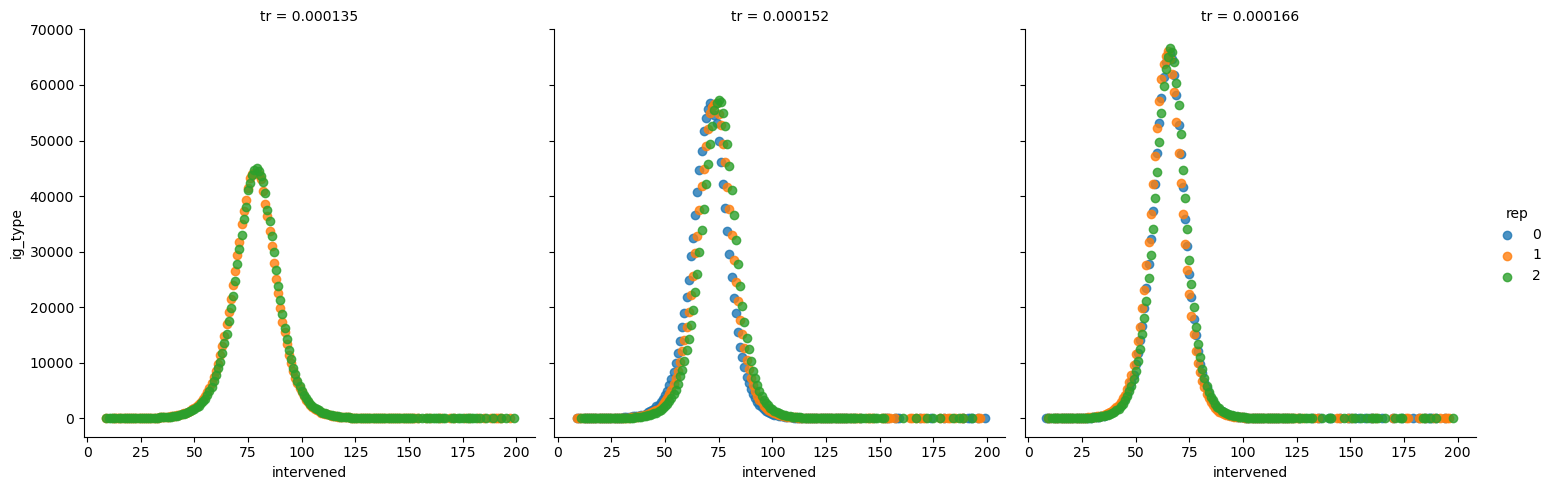

In [60]:
fig = sns.lmplot(x='intervened',y='ig_type',hue='rep',col='tr',
                fit_reg = False,data = count_mean.reset_index())
plt.show()

Below we will be using cumsum for the cumulative sum. 

In [61]:
cumulative_count = intv_df.groupby(['rep','intervened','tr'])['ig_type'].count().groupby(level=['rep']).cumsum().reset_index()

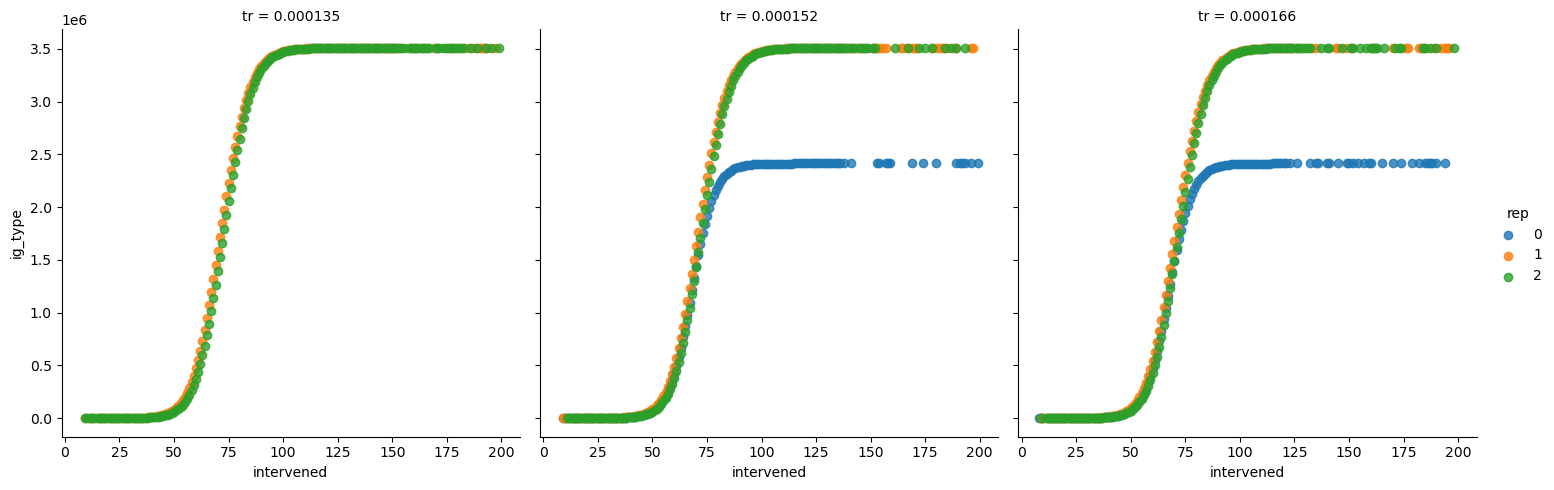

In [62]:
fig = sns.lmplot(x='intervened',y='ig_type',hue='rep',col='tr',
                fit_reg = False,data = cumulative_count.reset_index())
plt.show()